<a href="https://colab.research.google.com/github/zii-bee/therapySentimentAnalysis/blob/main/sentiment_analysis_nltkVader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import wordnet as wn
import nltk
from google.colab import files

# resource check
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('omw-1.4')

# constructor
sid = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
def sentiment_analysis(input_url):
    data = pd.read_csv(input_url)

    def calculate_scores(response):
        sentiment = sid.polarity_scores(response)

        # polarity normalization
        polarity_score = (sentiment['compound'] + 1) * 5

        # 'main' keywords
        categories = {
            "Validation": ["acknowledge", "understand", "validate", "empathize"],
            "Encouragement": ["encourage", "motivate", "support", "uplift"],
            "Reassurance": ["reassure", "comfort", "console", "ease"],
            "Supportive": ["helpful", "assist", "guide", "aid"]
        }

        def score_category(keywords, text):
            score = 0.0
            for word in keywords:
                if word in text:
                    score += 1.0
                for syn in wn.synsets(word):
                    for lemma in syn.lemma_names():
                        if lemma in text:
                            score += 0.5  # weight for synonyms
            return score / len(keywords) if keywords else 0.0  # normalization

        scores = {cat: score_category(words, response.lower()) for cat, words in categories.items()}

        overall_sentiment = (polarity_score + sum(scores.values())) / (len(scores) + 1)

        return {
            "Polarity": polarity_score,
            **scores,
            "Overall Sentiment": overall_sentiment
        }
    scores = data['Response'].apply(calculate_scores)
    score_df = pd.DataFrame(scores.tolist())
    final_data = pd.concat([data, score_df], axis=1)
    return final_data

In [ ]:
input_url = "https://raw.githubusercontent.com/kazisean/llm-patient-research/main/clean-data/aiDF.csv"
df_ai = sentiment_analysis(input_url)

In [ ]:
output_csv = "sntma_aiDF.csv"
df_ai.to_csv(output_csv, index=False)
files.download(output_csv)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
input_url = "https://raw.githubusercontent.com/kazisean/llm-patient-research/main/clean-data/realDF.csv"
df_real = sentiment_analysis(input_url)

In [ ]:
output_csv2 = "sntma_realDF.csv"
df_real.to_csv(output_csv2, index=False)
files.download(output_csv2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Comparitive Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



Describe

In [ ]:
print("AI-Human Dataset Statistics")
print(df_ai.describe())

print("\nHuman-Human Dataset Statistics")
print(df_real.describe())

AI-Human Dataset Statistics
         Polarity  Validation  Encouragement  Reassurance  Supportive  \
count  516.000000  516.000000     516.000000   516.000000  516.000000   
mean     9.569652    1.188711       2.679748     0.858769    1.319525   
std      1.549396    0.740698       1.243222     1.028807    0.732924   
min      0.153000    0.000000       0.000000     0.000000    0.000000   
25%      9.918375    1.000000       3.000000     0.000000    0.875000   
50%      9.963250    1.125000       3.125000     0.125000    1.125000   
75%      9.978500    1.375000       3.250000     1.750000    1.500000   
max      9.995000    3.250000       4.875000     4.125000    4.125000   

       Overall Sentiment  
count         516.000000  
mean            3.123281  
std             0.567401  
min             0.325800  
25%             2.918125  
50%             3.186850  
75%             3.463175  
max             4.421500  

Human-Human Dataset Statistics
         Polarity  Validation  Encourag

In [ ]:
df_ai['Dataset'] = 'AI'
df_real['Dataset'] = 'Real'
df_combined = pd.concat([df_ai, df_real])
categories = ["Polarity", "Validation", "Encouragement", "Reassurance", "Supportive", "Overall Sentiment"]


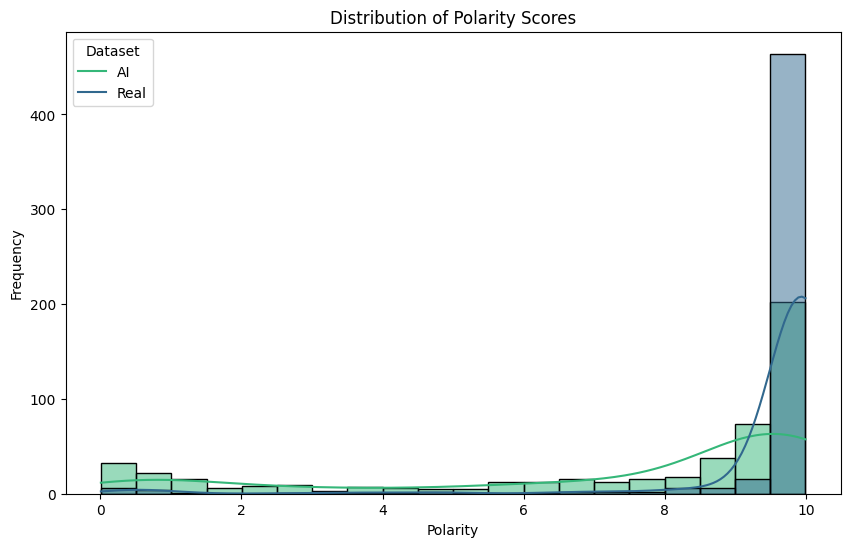

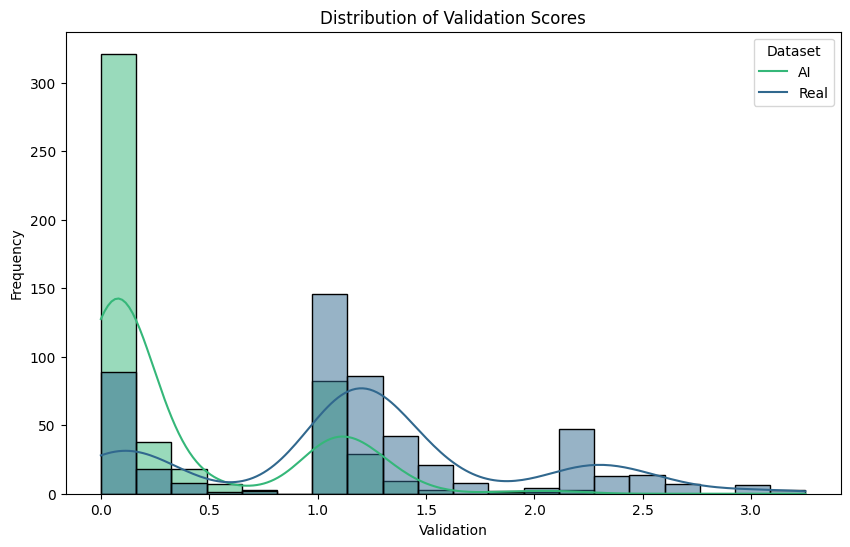

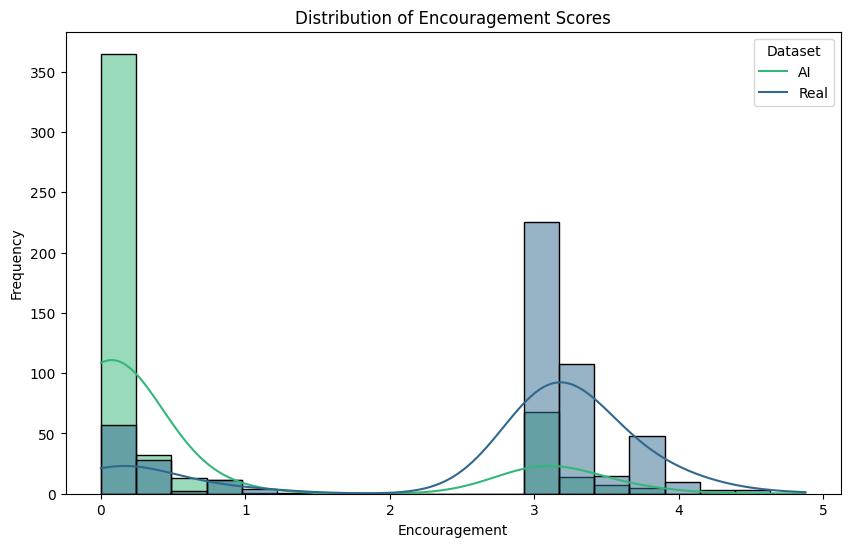

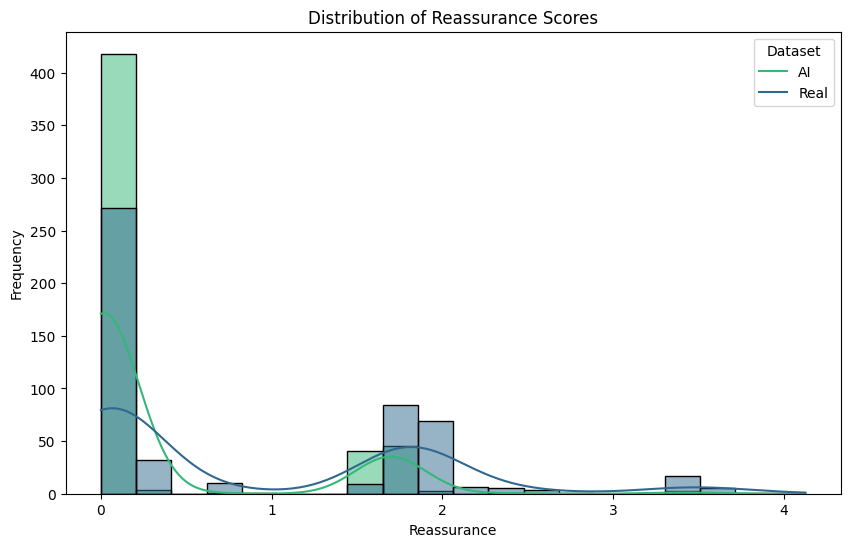

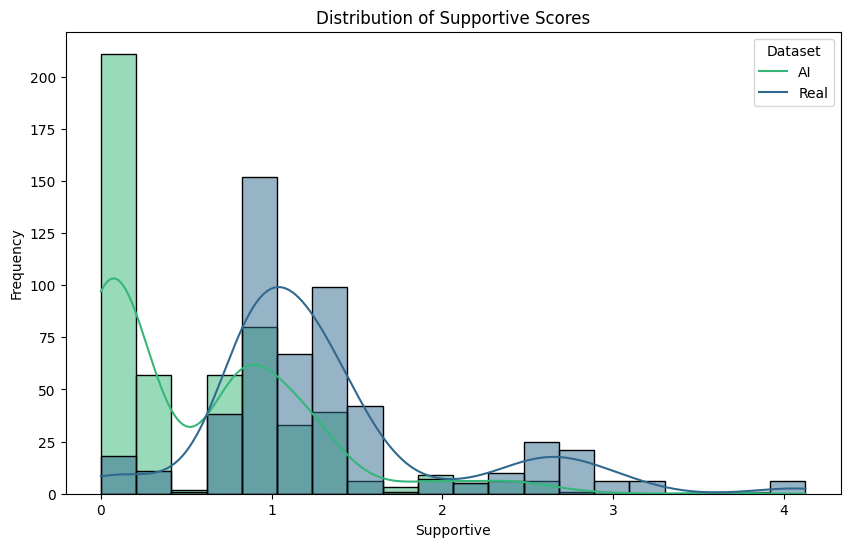

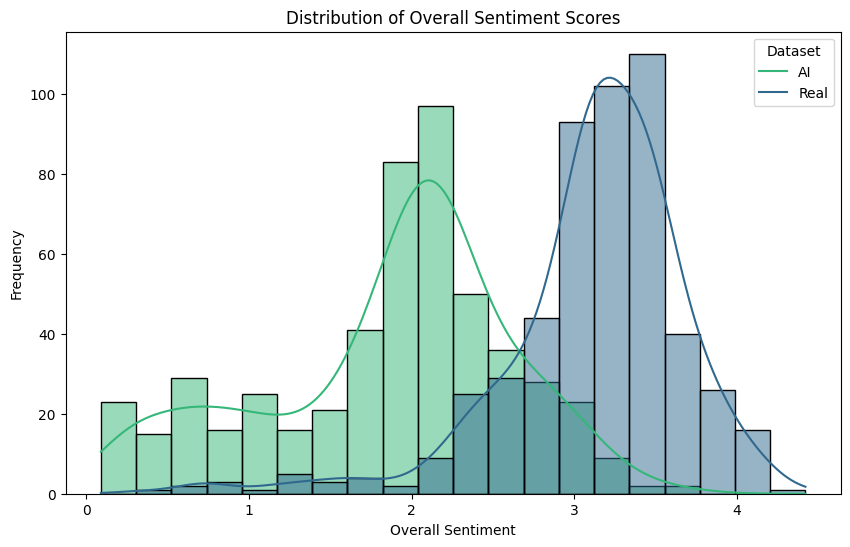

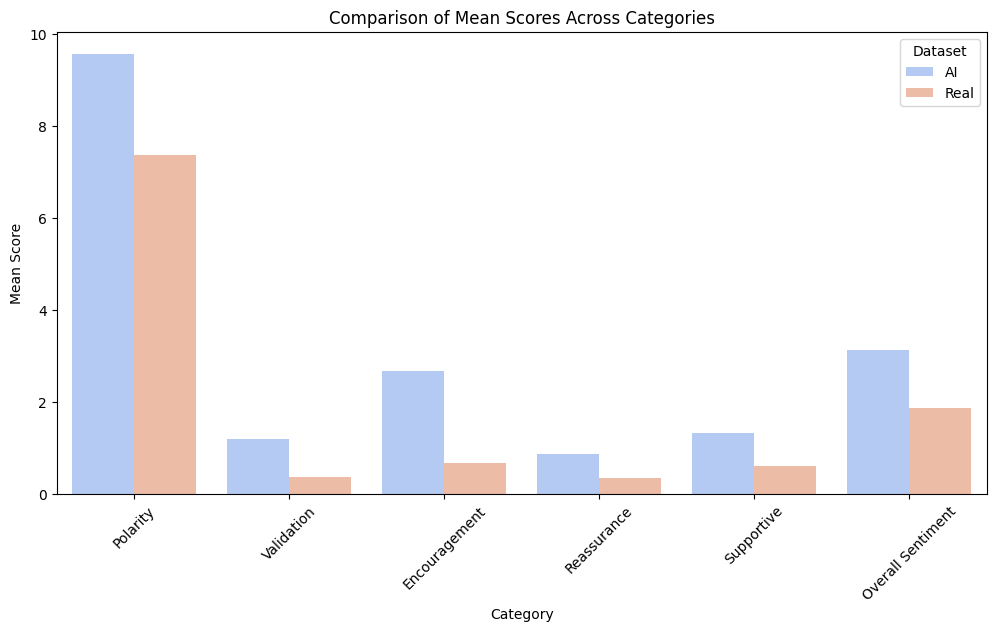

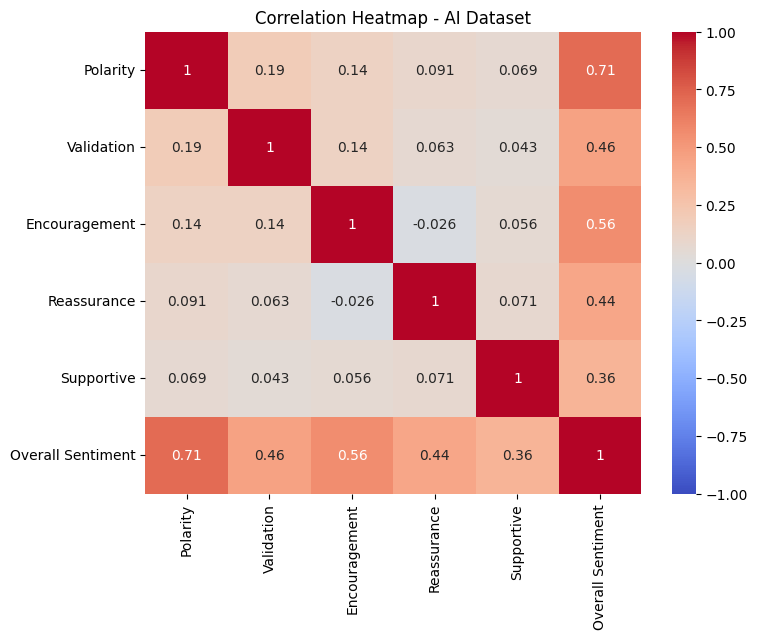

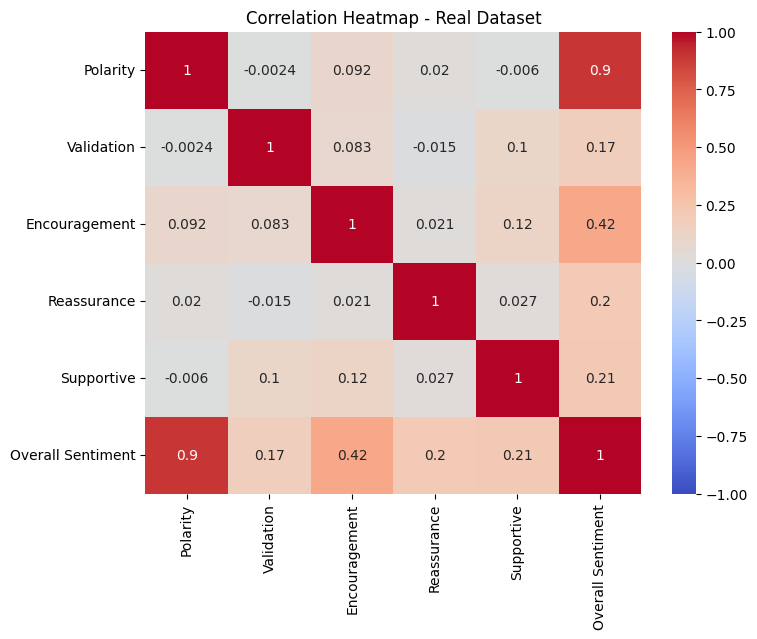

In [ ]:
for category in categories:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_combined, x=category, hue='Dataset', kde=True, palette="viridis", bins=20)
    plt.title(f"Distribution of {category} Scores")
    plt.xlabel(category)
    plt.ylabel("Frequency")
    plt.legend(title="Dataset", labels=["AI", "Real"])
    plt.show()

# compare means
mean_scores = df_combined.groupby('Dataset')[categories].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=mean_scores.melt(id_vars="Dataset", var_name="Category", value_name="Mean Score"),
            x="Category", y="Mean Score", hue="Dataset", palette="coolwarm")
plt.title("Comparison of Mean Scores Across Categories")
plt.xlabel("Category")
plt.ylabel("Mean Score")
plt.xticks(rotation=45)
plt.legend(title="Dataset")
plt.show()

# heatmap corr ai
plt.figure(figsize=(8, 6))
sns.heatmap(df_ai[categories].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap - AI Dataset")
plt.show()

# heatmap corr real
plt.figure(figsize=(8, 6))
sns.heatmap(df_real[categories].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap - Real Dataset")
plt.show()

<ipython-input-11-43eb32cd1ba4>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_ai[category], label="AI-Human", shade=True, color="blue")
<ipython-input-11-43eb32cd1ba4>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_real[category], label="Human-Human", shade=True, color="orange")


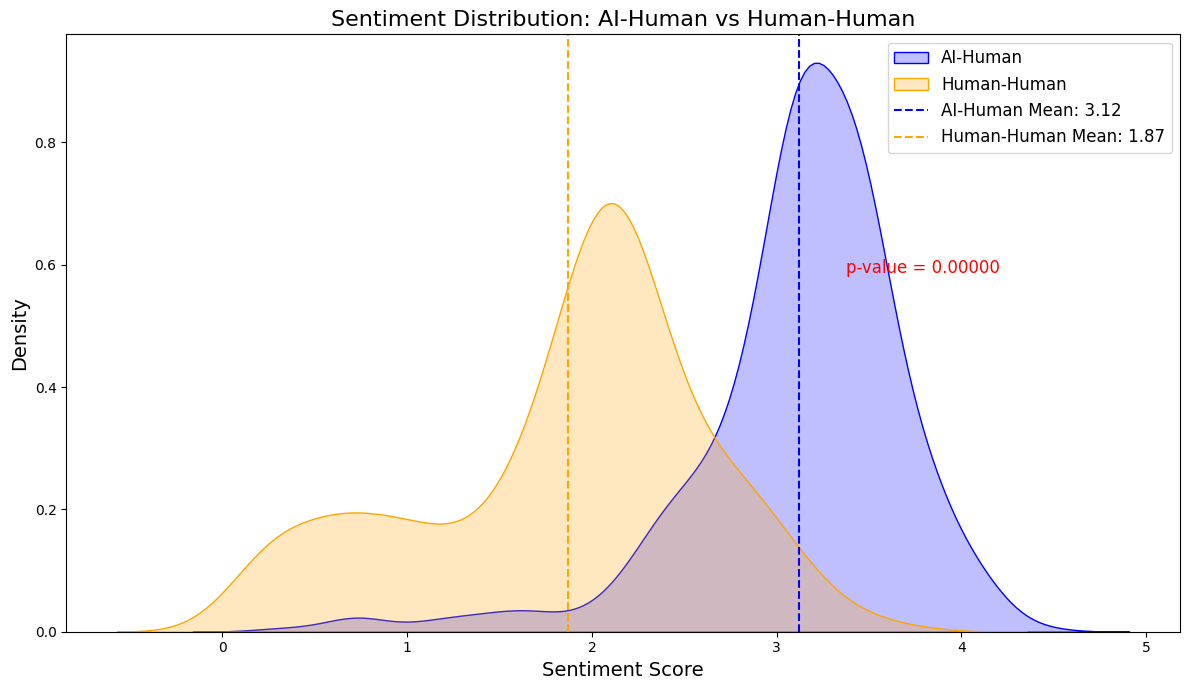

Z-statistic: 29.865, P-value: 0.00000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ztest

category = "Overall Sentiment"

# Perform a z-test
z_stat, p_value = ztest(df_ai[category], df_real[category])

# Compute means for visualization
mean_ai = df_ai[category].mean()
mean_real = df_real[category].mean()

# Visualize the distributions
plt.figure(figsize=(12, 7))
sns.kdeplot(df_ai[category], label="AI-Human", shade=True, color="blue")
sns.kdeplot(df_real[category], label="Human-Human", shade=True, color="orange")
plt.axvline(mean_ai, color='blue', linestyle='--', label=f'AI-Human Mean: {mean_ai:.2f}')
plt.axvline(mean_real, color='orange', linestyle='--', label=f'Human-Human Mean: {mean_real:.2f}')

# Titles and labels
plt.title("Sentiment Distribution: AI-Human vs Human-Human", fontsize=16)
plt.xlabel("Sentiment Score", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(fontsize=12)

# Annotate p-value
plt.text(0.7, 0.6, f'p-value = {p_value:.5f}', fontsize=12, color="red", transform=plt.gca().transAxes)

# Show the plot
plt.tight_layout()
plt.show()

# Print z-test results
print(f"Z-statistic: {z_stat:.3f}, P-value: {p_value:.5f}")


AI-Human Data Summary:
count    516.000000
mean       9.569652
std        1.549396
min        0.153000
25%        9.918375
50%        9.963250
75%        9.978500
max        9.995000
Name: Polarity, dtype: float64

Human-Human Data Summary:
count    516.000000
mean       7.366241
std        3.318368
min        0.007500
25%        5.867250
50%        9.169000
75%        9.785500
max        9.984500
Name: Polarity, dtype: float64


<ipython-input-25-76dfed412b56>:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_ai[category], label="AI-Human", shade=True, color="blue")
<ipython-input-25-76dfed412b56>:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_real[category], label="Human-Human", shade=True, color="orange")


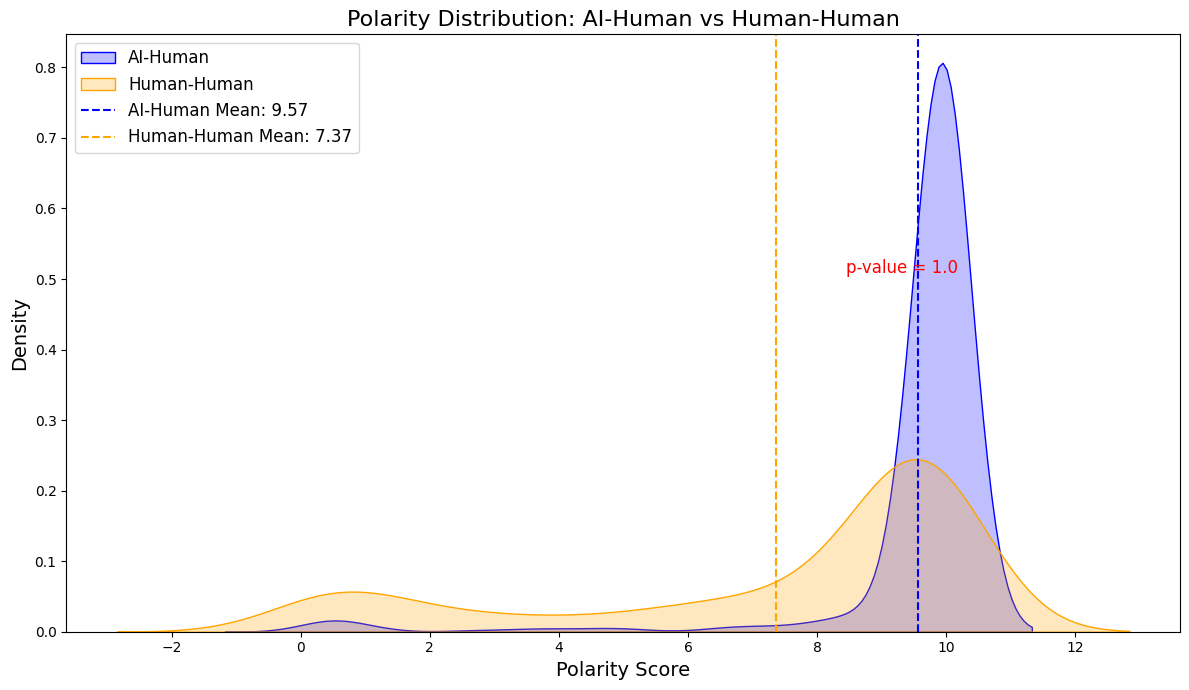

Z-statistic: 13.667, P-value: 1.000000e+00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ztest

# Example: Verify data by printing summary statistics
category = "Polarity"
print("AI-Human Data Summary:")
print(df_ai[category].describe())
print("\nHuman-Human Data Summary:")
print(df_real[category].describe())

# Human > AI

# Perform a z-test
z_stat, p_value = ztest(df_ai[category], df_real[category])

# Compute means for visualization
mean_ai = df_ai[category].mean()
mean_real = df_real[category].mean()

# Visualize the distributions
plt.figure(figsize=(12, 7))
sns.kdeplot(df_ai[category], label="AI-Human", shade=True, color="blue")
sns.kdeplot(df_real[category], label="Human-Human", shade=True, color="orange")
plt.axvline(mean_ai, color='blue', linestyle='--', label=f'AI-Human Mean: {mean_ai:.2f}')
plt.axvline(mean_real, color='orange', linestyle='--', label=f'Human-Human Mean: {mean_real:.2f}')

# Titles and labels
plt.title(category + " Distribution: AI-Human vs Human-Human", fontsize=16)
plt.xlabel(category + " Score", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(fontsize=12)

# Annotate p-value with more precision
plt.text(0.7, 0.6, f'p-value = {1-p_value}', fontsize=12, color="red", transform=plt.gca().transAxes)

# Show the plot
plt.tight_layout()
plt.show()

# Print z-test results with precision
print(f"Z-statistic: {z_stat:.3f}, P-value: {1-p_value:.6e}")


<ipython-input-13-2aa150592def>:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_ai[category], label="AI-Human", shade=True, color="blue")
<ipython-input-13-2aa150592def>:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_real[category], label="Human-Human", shade=True, color="orange")


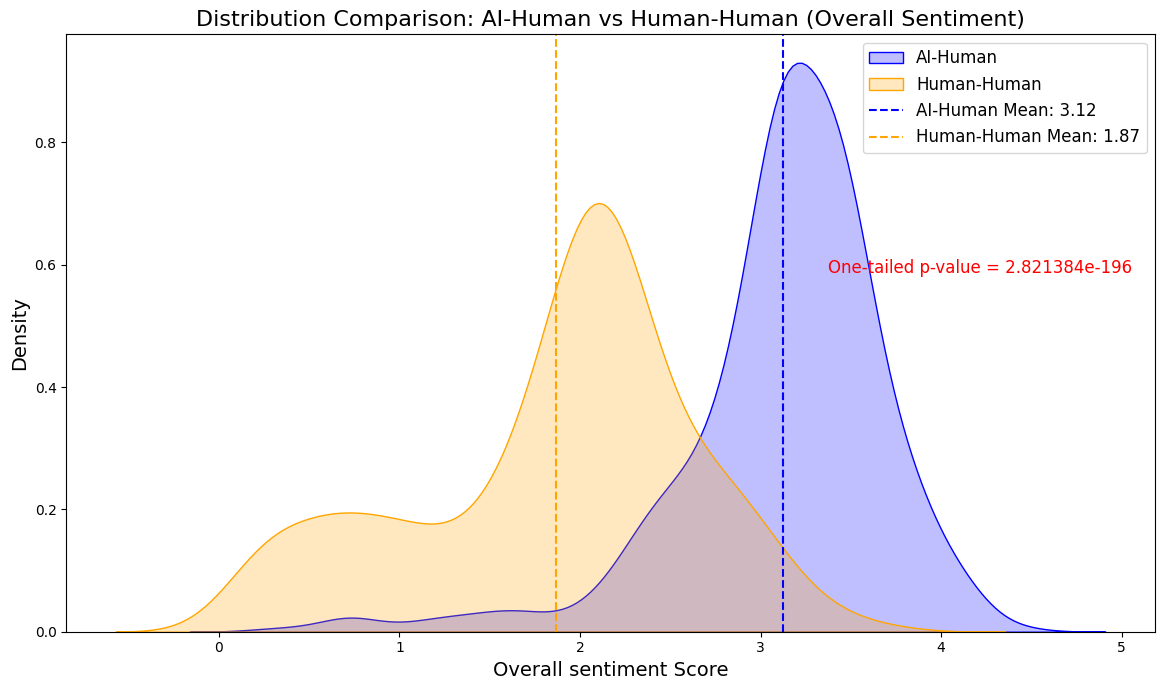

Z-statistic: 29.865
Two-tailed P-value: 5.642769e-196
One-tailed P-value: 2.821384e-196


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ztest

# Define the column to analyze
category = 'Overall Sentiment'  # Change this to the column you want to analyze

# Perform a z-test (two-tailed by default)
z_stat, p_two_tailed = ztest(df_ai[category], df_real[category])

# Convert to one-tailed p-value
if z_stat > 0:
    p_one_tailed = p_two_tailed / 2
else:
    p_one_tailed = 1 - p_two_tailed / 2

# Compute means for visualization
mean_ai = df_ai[category].mean()
mean_real = df_real[category].mean()

# Visualize the distributions
plt.figure(figsize=(12, 7))
sns.kdeplot(df_ai[category], label="AI-Human", shade=True, color="blue")
sns.kdeplot(df_real[category], label="Human-Human", shade=True, color="orange")
plt.axvline(mean_ai, color='blue', linestyle='--', label=f'AI-Human Mean: {mean_ai:.2f}')
plt.axvline(mean_real, color='orange', linestyle='--', label=f'Human-Human Mean: {mean_real:.2f}')

# Titles and labels
plt.title(f"Distribution Comparison: AI-Human vs Human-Human ({category})", fontsize=16)
plt.xlabel(f"{category.capitalize()} Score", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(fontsize=12)

# Annotate one-tailed p-value
plt.text(0.7, 0.6, f'One-tailed p-value = {p_one_tailed:.6e}', fontsize=12, color="red", transform=plt.gca().transAxes)

# Show the plot
plt.tight_layout()
plt.show()

# Print z-test results with precision
print(f"Z-statistic: {z_stat:.3f}")
print(f"Two-tailed P-value: {p_two_tailed:.6e}")
print(f"One-tailed P-value: {p_one_tailed:.6e}")


<ipython-input-21-6b54fe24f7d5>:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_ai[category], label="AI-Human", shade=True, color="blue")
<ipython-input-21-6b54fe24f7d5>:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_real[category], label="Human-Human", shade=True, color="orange")


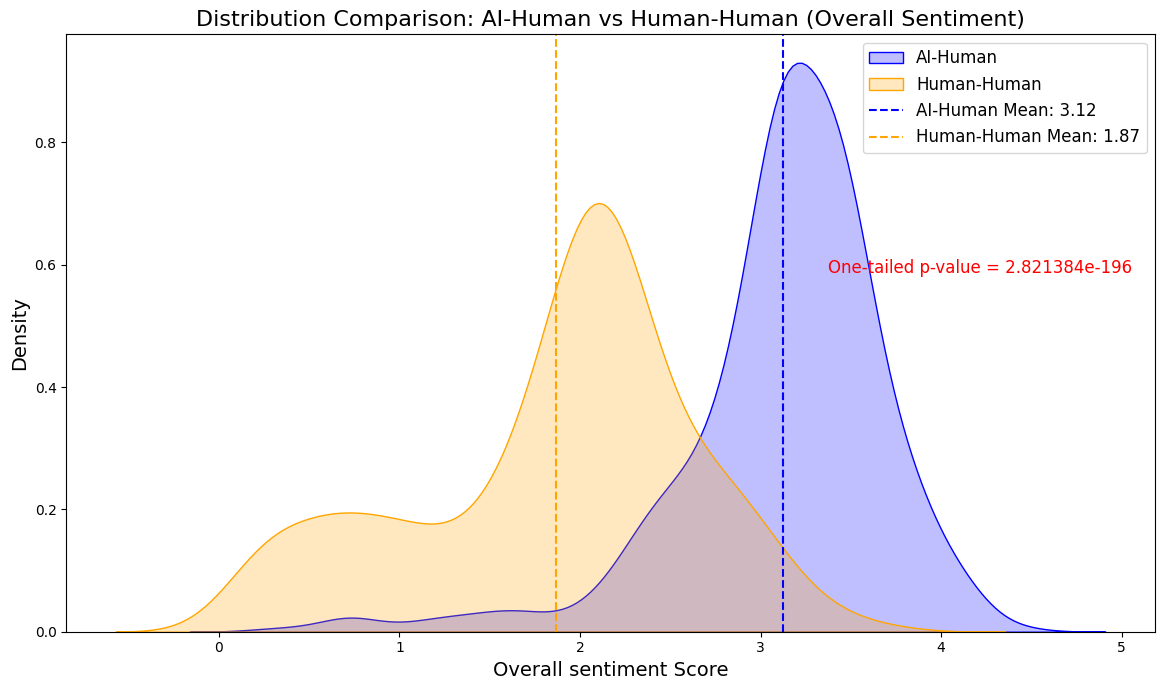

Z-statistic: -29.865
Two-tailed P-value: 5.642769e-196
One-tailed P-value: 2.821384e-196


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ztest

# Define the column to analyze
category = 'Overall Sentiment'  # Change this to the column you want to analyze

# Perform a z-test (two-tailed by default)
z_stat, p_two_tailed = ztest(df_real[category], df_ai[category])

# Convert to one-tailed p-value for Human > AI (opposite direction of previous)
if z_stat > 0:
    p_one_tailed = 1 - p_two_tailed / 2  # Human > AI
else:
    p_one_tailed = p_two_tailed / 2  # Human > AI

# Compute means for visualization
mean_ai = df_ai[category].mean()
mean_real = df_real[category].mean()

# Visualize the distributions
plt.figure(figsize=(12, 7))
sns.kdeplot(df_ai[category], label="AI-Human", shade=True, color="blue")
sns.kdeplot(df_real[category], label="Human-Human", shade=True, color="orange")
plt.axvline(mean_ai, color='blue', linestyle='--', label=f'AI-Human Mean: {mean_ai:.2f}')
plt.axvline(mean_real, color='orange', linestyle='--', label=f'Human-Human Mean: {mean_real:.2f}')

# Titles and labels
plt.title(f"Distribution Comparison: AI-Human vs Human-Human ({category})", fontsize=16)
plt.xlabel(f"{category.capitalize()} Score", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(fontsize=12)

# Annotate one-tailed p-value
plt.text(0.7, 0.6, f'One-tailed p-value = {p_one_tailed:.6e}', fontsize=12, color="red", transform=plt.gca().transAxes)

# Show the plot
plt.tight_layout()
plt.show()

# Print z-test results with precision
print(f"Z-statistic: {z_stat:.3f}")
print(f"Two-tailed P-value: {p_two_tailed:.6e}")
print(f"One-tailed P-value: {p_one_tailed:.6e}")


In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob
import pandas as pd

def sentiment_analysis_textblob(input_url):
    data = pd.read_csv(input_url)

    def calculate_scores(response):
        blob = TextBlob(response)
        polarity_score = (blob.sentiment.polarity + 1) * 5  # normalize to 0-10 scale
        subjectivity_score = blob.sentiment.subjectivity

        # 'main' keywords
        categories = {
            "Validation": ["acknowledge", "understand", "validate", "empathize"],
            "Encouragement": ["encourage", "motivate", "support", "uplift"],
            "Reassurance": ["reassure", "comfort", "console", "ease"],
            "Supportive": ["helpful", "assist", "guide", "aid"]
        }

        def score_category(keywords, text):
            score = 0.0
            for word in keywords:
                if word in text:
                    score += 1.0
            return score / len(keywords) if keywords else 0.0  # normalization

        scores = {cat: score_category(words, response.lower()) for cat, words in categories.items()}

        overall_sentiment = (polarity_score + sum(scores.values())) / (len(scores) + 1)

        return {
            "Polarity": polarity_score,
            **scores,
            "Overall Sentiment": overall_sentiment,
            "Subjectivity": subjectivity_score
        }

    scores = data['Response'].apply(calculate_scores)
    score_df = pd.DataFrame(scores.tolist())
    final_data = pd.concat([data, score_df], axis=1)
    return final_data

input_url = "https://raw.githubusercontent.com/kazisean/llm-patient-research/main/clean-data/aiDF.csv"
df_ai_tb = sentiment_analysis_textblob(input_url)
df_ai_tb.to_csv("sntma_aiDF_textblob.csv", index=False)

input_url = "https://raw.githubusercontent.com/kazisean/llm-patient-research/main/clean-data/realDF.csv"
df_real_tb = sentiment_analysis_textblob(input_url)
df_real_tb.to_csv("sntma_realDF_textblob.csv", index=False)


In [ ]:
print(df_ai_tb.describe)

<bound method NDFrame.describe of                                                Context  \
0    go thing feeling barely sleep think worthless ...   
1    feel month start have trouble sleep panic atta...   
2    suffer adult adhd anxiety disorder depression ...   
3    struggle depression pretty intense mood swing ...   
4    selfharm stop awhile sad depress automatically...   
..                                                 ...   
511  teenager sneak house night year catch time wan...   
512  have random thought not want thing like not wo...   
513  boyfriend recovery drug addiction recently get...   
514  rent boyfriend parent father drop unannounced ...   
515  mother combative not want talk depression not ...   

                                              Response  Polarity  Validation  \
0    sorry hear feel way important acknowledge go d...  5.148380        0.25   
1    sorry hear go sound like experience difficult ...  5.293727        0.25   
2    sorry hear go difficult 

In [ ]:
print(df_real_tb.describe)

<bound method NDFrame.describe of                                                Context  \
0    go thing feeling barely sleep think worthless ...   
1    feel month start have trouble sleep panic atta...   
2    suffer adult adhd anxiety disorder depression ...   
3    struggle depression pretty intense mood swing ...   
4    selfharm stop awhile sad depress automatically...   
..                                                 ...   
511  teenager sneak house night year catch time wan...   
512  have random thought not want thing like not wo...   
513  boyfriend recovery drug addiction recently get...   
514  rent boyfriend parent father drop unannounced ...   
515  mother combative not want talk depression not ...   

                                              Response  Polarity  Validation  \
0    think worthless maybe need find new people han...  4.773674        0.25   
1    answer inner life successfully reach sense fee...  5.375000        0.00   
2    simply counsel seek numb

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_md

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_md-3.7.1/en_core_web_md-3.7.1-py3-none-any.whl (42.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
